<a href="https://colab.research.google.com/github/Daksh-Raghuvanshi/Machine-Learnig-Projects/blob/main/Normalization_Standardization_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


For example here we are only considering feartures which are numeric by nature

In [ ]:
df2 = df[['survived' , 'pclass' , 'age' , 'parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


cleaning the data for the instance

In [ ]:
df3 = df2.fillna(df2.mean())

In [ ]:
X = df3.drop(columns = ['survived'])
y = df3['survived']

In [ ]:
print(X.shape)
print(y.shape)

(891, 3)
(891,)


In [ ]:
X_train , X_test , y_train , y_test =  train_test_split(X , y , test_size = 0.2 , random_state = 51)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 3)
(179, 3)
(712,)
(179,)


In [ ]:
sc = StandardScaler()


In [ ]:
sc.fit(X_train)
print(sc.mean_)
print(sc.scale_)

[ 2.30617978 29.55409121  0.39185393]
[ 0.84405789 12.99162985  0.79647463]


In [ ]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [ ]:
X_train_sc_df = pd.DataFrame(X_train_sc , columns= ['pclass' , 'age' , 'parch'])
X_test_sc_df = pd.DataFrame(X_test_sc , columns= ['pclass' , 'age' , 'parch'])

In [ ]:
X_train_sc_df.head()


,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [ ]:
X_train_sc_df.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


Now lets try for MinMaxScaler or Normalization

In [ ]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [ ]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [ ]:
X_train_mmc_df = pd.DataFrame(X_train_mmc , columns= ['pclass' , 'age' , 'parch'])
X_test_mmc_df = pd.DataFrame(X_test_mmc , columns= ['pclass' , 'age' , 'parch'])

In [ ]:
X_train_mmc_df.head()

,pclass,age,parch
0,1.0,0.334089,0.0
1,1.0,0.780391,0.0
2,1.0,0.149901,0.0
3,1.0,0.249079,0.0
4,1.0,0.414836,0.4


In [ ]:
X_train_mmc_df.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


Lets check the distribution if its same or not

<Figure size 1800x1800 with 0 Axes>

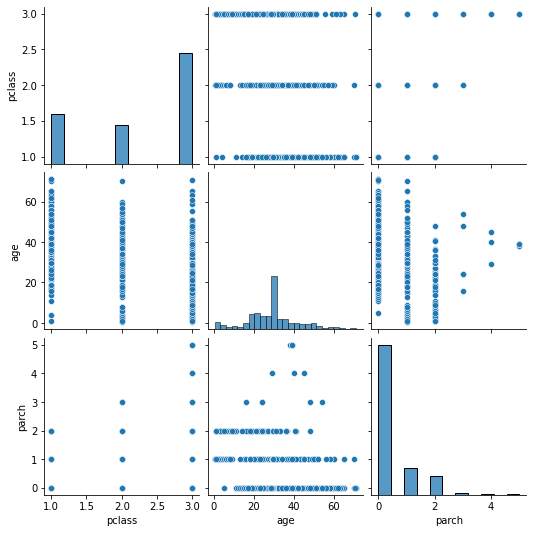

In [ ]:
plt.figure(figsize = (25,25))
sns.pairplot(X_train)

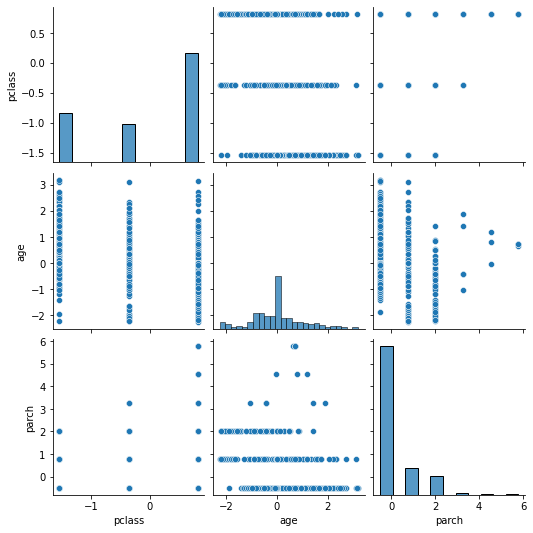

In [ ]:
sns.pairplot(X_train_sc_df)

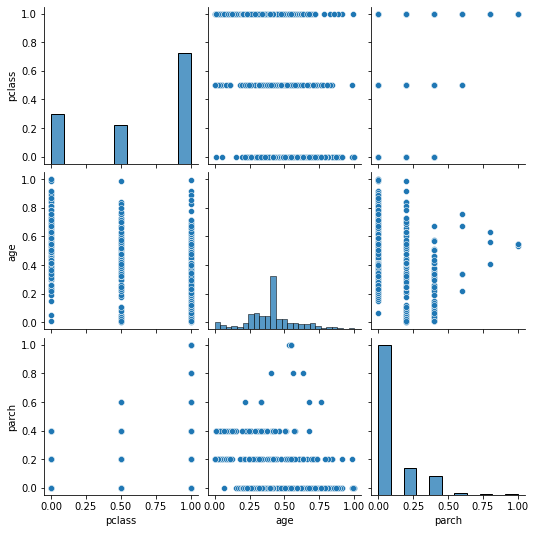

In [ ]:
sns.pairplot(X_train_mmc_df)

Hence, the Standardization and Normalization does not affect the Distribution of the data.